<a href="https://colab.research.google.com/github/robsonbfreitas/TrabalhoFinal/blob/main/TrabalhoFinalV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando bibliotecas
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

**Carregando os arquivos a serem utilizados no modelo**

Features.csv - Arquivo que contém informações como: valores utilizados em feriados, indicador de feriado

train.csv - Arquivo que contém os valores de vendas

---



In [4]:
df = pd.read_csv('features.csv')
dftrain = pd.read_csv('trainV3.csv')


A classe Previsao_de_Vendas tem como objetivo, através de seus métodos, fazer tratamento de dados, realizar o treinamento do modelo, fazer a previsão e realizar o score do resultado do modelo

In [6]:
class Previsao_de_Vendas:

  def processa_Store_Dept(self, store, dept, df_Original):

   #print ('Processa store : ' + str(store))
   #print ('dept : ' + str(dept))
   qry = 'Store == ' + str(store) + ' & Dept == ' + str(dept)
   df_Store_Dept = df_Original.query(qry)
    
   return df_Store_Dept

  def setar_Campos(self, df): 
    df_XTrain = df[['Store','Date','IsHoliday_y', 'Dept', 'Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
        
    return df_XTrain

  def tratando_Dados(self, df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index(['Date'], inplace=True)
    df.fillna(0, inplace=True)
    df[['Store','Dept','IsHoliday_y','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].shift(1)
    df = df.iloc[1:]
    df = pd.get_dummies(df)
    return df  

  def setando_y(self, df):
    y_train = df[['Weekly_Sales']]
    y_train = y_train.iloc[1:]
    return y_train

  def treinar_Modelo(self, X, y):
    reg = LinearRegression()
    reg.fit(X, y)
    
    return reg
  
  def prever(self, reg, df):
    resultado = reg.predict(df)

    return resultado

  def verificar_Score(self, y, result):
    result_score = r2_score(y, result)

    return result_score 


Fazendo o merge entre os arquivos train e feature que possuem lojas e datas em commum

In [7]:
df_testeFeature = dftrain.merge(df, on=['Store','Date'], how='left')

In [8]:
df_testeFeature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Esta é a parte do modelo que aciona a classe Previsao_de_Vendas. A previsão será feita para cada departamento de uma loja

In [ ]:

lista_Geral_resultados = []
dept_Aux = 0
j = 0
for i in df_testeFeature.index:
    
  if df_testeFeature['Dept'][i] != dept_Aux:
    #print('Chama func Store: ' + str(df_testeFeature.iloc[i].Store) + ' - Dept: ' + str(df_testeFeature.iloc[i].Dept) )
    #print('Chama func Store: ' + str(df_testeFeature['Store'][i]) + ' - Dept: ' + str(df_testeFeature['Dept'][i]) )
    storesDept = Previsao_de_Vendas()
    df_StoreDept = storesDept.processa_Store_Dept(df_testeFeature['Store'][i], df_testeFeature['Dept'][i], df_testeFeature)
    df_XTeste = storesDept.setar_Campos(df_StoreDept)
    y = storesDept.setando_y(df_XTeste)
    df_XTeste = storesDept.tratando_Dados(df_XTeste)
    regressao = storesDept.treinar_Modelo(df_XTeste, y)
    result = storesDept.prever(regressao, df_XTeste)
    resultado_score = storesDept.verificar_Score(y, result)
    lista = []
    lista.append(df_testeFeature['Store'][i])
    lista.append(df_testeFeature['Dept'][i])
    lista.append(result[result.size - 1])
    lista.append(resultado_score)
    #lista.append(j)
    lista_Geral_resultados.append(lista)
    dept_Aux = df_testeFeature['Dept'][i]
    j = 0
  
  j +=1
  if df_testeFeature['Dept'][i] > 10:
    break
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [11]:
df_testeFeature2 = df_testeFeature.copy()

In [12]:
df_testeFeature2

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421564,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421565,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421566,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421567,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [36]:
df_testeFeature2['Date'] = pd.to_datetime(df_testeFeature2['Date'])


In [42]:
df_testeFeature2.set_index('Date', inplace=True)

In [39]:
df_testeFeature2.drop(columns=['Store','Dept'], inplace=True)

In [43]:
df_testeFeature2.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


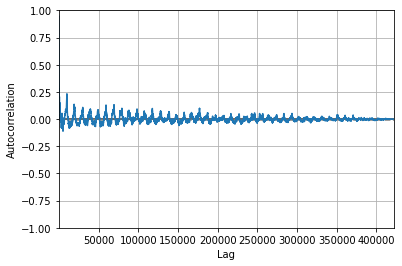

In [44]:
autocorrelation_plot(df_testeFeature2)
pyplot.show()

In [45]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

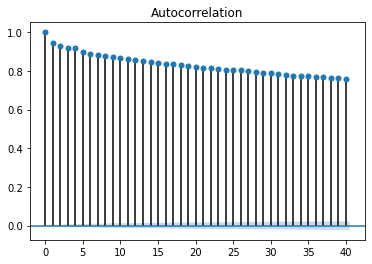

In [46]:
plot_acf(df_testeFeature2, lags=40)
pyplot.show()

In [47]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [48]:
#ARIMA (p,d,q)
model = ARIMA(df_testeFeature2, order=(7,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [49]:
model_fit = model.fit()

In [50]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:               421568
Model:                 ARIMA(7, 1, 1)   Log Likelihood            -4308029.061
Method:                       css-mle   S.D. of innovations           6635.051
Date:                Wed, 02 Jun 2021   AIC                        8616078.122
Time:                        21:51:46   BIC                        8616187.639
Sample:                             1   HQIC                       8616109.346
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0566      2.953     -0.019      0.985      -5.845       5.731
ar.L1.D.Weekly_Sales     0.4393      0.003    128.708      0.000       0.433       0.446
ar.L2.D.Week

In [51]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

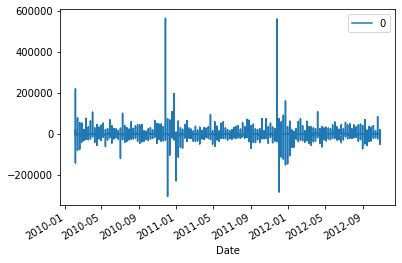

In [52]:
residuals.plot()
pyplot.show()

In [ ]:
lista_Geral_resultados

[[1, 1, array([27390.81]), 1.0],
 [1, 2, array([43134.88]), 1.0],
 [1, 3, array([9350.9]), 1.0],
 [1, 4, array([36292.6]), 1.0],
 [1, 5, array([25846.94]), 1.0],
 [1, 6, array([4032.5]), 1.0],
 [1, 7, array([21449.85]), 1.0],
 [1, 8, array([39255.35]), 1.0],
 [1, 9, array([41040.84]), 1.0],
 [1, 10, array([26285.27]), 1.0],
 [1, 11, array([22399.83]), 1.0]]

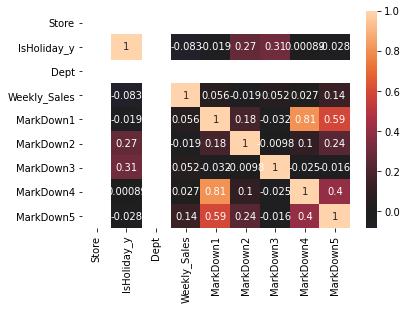

In [ ]:
sns.heatmap(df_XTeste.corr(), annot=True, center=0)

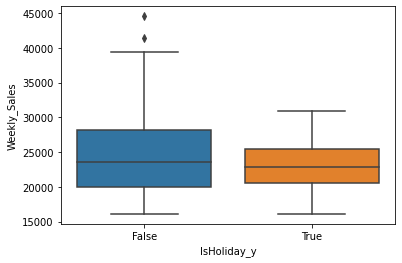

In [ ]:
sns.boxplot(data=df_XTeste, x='IsHoliday_y', y='Weekly_Sales')

Text(0, 0.5, 'Vendas semanais')

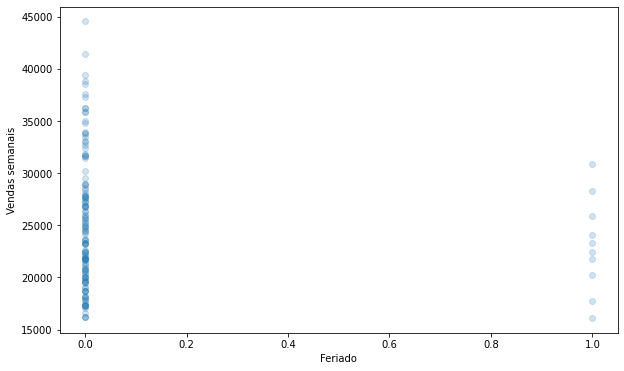

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_XTeste['IsHoliday_y'], df_XTeste['Weekly_Sales'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('Feriado')
plt.ylabel('Vendas semanais')

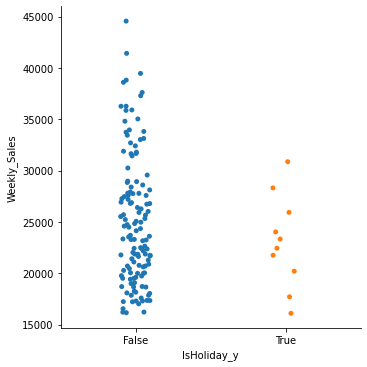

In [ ]:
sns.catplot(data=df_XTeste, x='IsHoliday_y', y='Weekly_Sales')

In [ ]:
df_XTeste['Weekly_Sales'][141]

22399.83